In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)


In [2]:
df=pd.read_csv('/Users/sahilsharma/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv',index_col='EmployeeNumber')

In [ ]:
df1=pd.read_csv('/Users/sahilsharma/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv',index_col='EmployeeNumber')
df1['EmployementCount'].head(20)

In [3]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [5]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
df[['DailyRate','HourlyRate','MonthlyRate','StandardHours']].describe()

,DailyRate,HourlyRate,MonthlyRate,StandardHours
count,1470.000000,1470.000000,1470.000000,1470.0
mean,802.485714,65.891156,14313.103401,80.0
std,403.509100,20.329428,7117.786044,0.0
min,102.000000,30.000000,2094.000000,80.0
25%,465.000000,48.000000,8047.000000,80.0
50%,802.000000,66.000000,14235.500000,80.0
75%,1157.000000,83.750000,20461.500000,80.0
max,1499.000000,100.000000,26999.000000,80.0


Checking the skewness for Hourly Rate: -0.03231095290044942


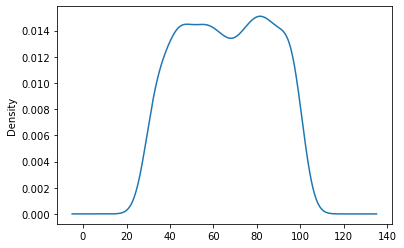

In [7]:
df['HourlyRate'].plot(kind='kde')
print('Checking the skewness for Hourly Rate:' ,df['HourlyRate'].skew())


Checking the skewness for Monthly Rate: 0.018577807891132458


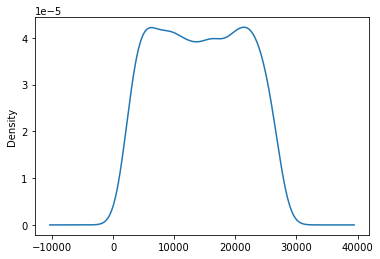

In [8]:
df['MonthlyRate'].plot(kind='kde') 
print('Checking the skewness for Monthly Rate:' ,df['MonthlyRate'].skew())

Checking the skewness for Hourly Rate: -0.003518568352325854


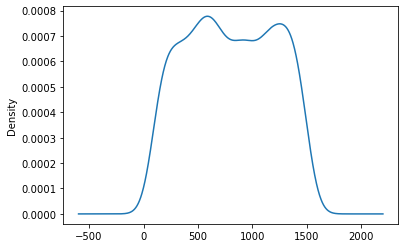

In [9]:
df['DailyRate'].plot(kind='kde') 
print('Checking the skewness for Hourly Rate:' ,df['DailyRate'].skew())

In [10]:
#The data doesn't have missing features
pd.DataFrame({'Count':df.isnull().sum(),'Missing%':df.isnull().mean()*100}).T 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#dropping insignificant features
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [12]:
#check for skewness in the data

for i in df.select_dtypes(exclude='O'):
    if df[i].skew() > 0.9:
        print(i,':',df[i].skew())

DistanceFromHome : 0.9581179956568269
JobLevel : 1.0254012829518246
MonthlyIncome : 1.3698166808390662
NumCompaniesWorked : 1.026471111968205
PerformanceRating : 1.921882702142603
StockOptionLevel : 0.9689803167738937
TotalWorkingYears : 1.1171718528128527
YearsAtCompany : 1.7645294543422085
YearsInCurrentRole : 0.9173631562908262
YearsSinceLastPromotion : 1.9842899833524859


In [13]:
#skewness treatment

for i in df.select_dtypes(exclude='O'):
    if df[i].skew()>0.9:
        df[i]=df[i].transform(lambda a: np.log1p(a))

In [14]:
for i in df.select_dtypes(exclude='O'):
    if df[i].skew() > 0:
        print(i,':',df[i].skew())

Age : 0.4132863018563338
JobLevel : 0.4481334349835919
MonthlyIncome : 0.2864483763069351
MonthlyRate : 0.018577807891132458
NumCompaniesWorked : 0.09289622460196824
PercentSalaryHike : 0.8211279755780908
PerformanceRating : 1.9218827021425997
StockOptionLevel : 0.27196254237149353
TrainingTimesLastYear : 0.5531241710537028
YearsSinceLastPromotion : 0.7188045525459852
YearsWithCurrManager : 0.8334509919918475


<AxesSubplot:title={'center':'Age Wise Binning wrt Attrition'}, xlabel='Age', ylabel='count'>

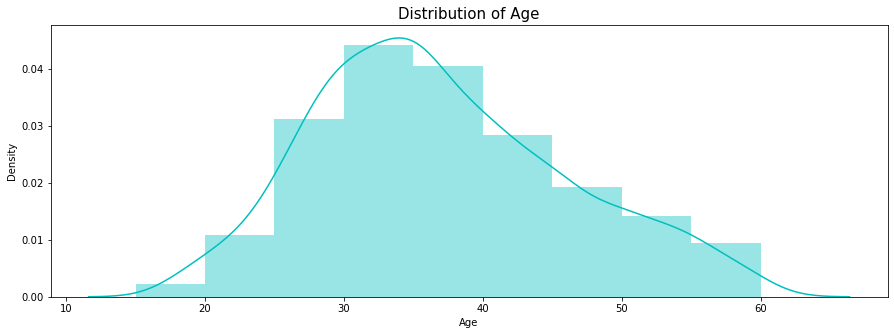

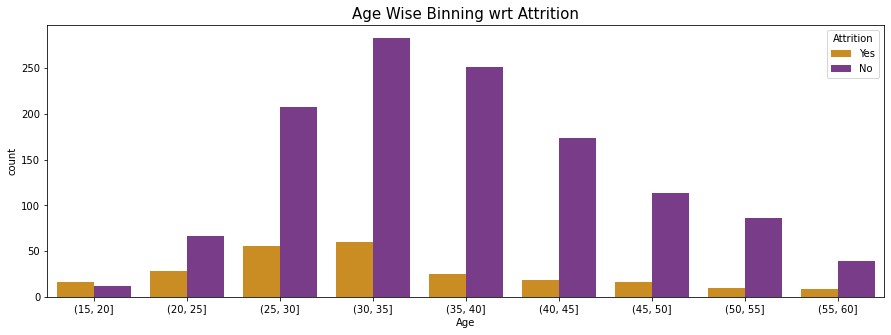

In [15]:
agebins=pd.cut(df['Age'],bins=[15,20,25,30,35,40,45,50,55,60]) 
#Discretisation to understand what age categories to Target

plt.figure(figsize=(15,5))
plt.title('Distribution of Age',size=15)
sns.distplot(df['Age'],bins=[15,20,25,30,35,40,45,50,55,60],color='c')

plt.figure(figsize=(15,5))
plt.title('Age Wise Binning wrt Attrition',size=15)
sns.countplot(agebins,hue='Attrition',data=df,palette='CMRmap_r')

In [16]:
# Statistical Analysis¶
# Questions
# Is gender influencing attrition?
# Which job role has a higher signifance in predecting attrition?
# Is Distance from home an important attribute?

from scipy.stats import chi2_contingency,chisquare,f_oneway

cat_cols =df.describe(include = "O").columns    # Statistical analysis for categorical data types, Chisquare is performed 

In [17]:
chi_stat=[]
p_value=[]
for i in cat_cols:
    chi_res=chi2_contingency(np.array(pd.crosstab(df[i],df['Attrition'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])
chi_square=pd.DataFrame([chi_stat,p_value])
chi_square=chi_square.T
col=['Chi Square Value','P-Value']
chi_square.columns=col
chi_square.index=cat_cols

In [18]:
chi_square

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
Gender,1.116967,2.905724e-01
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [19]:
chi_square[chi_square["P-Value"]<0.05]

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [20]:
features_p = list(chi_square[chi_square["P-Value"]<0.05].index)
print("Significant categorical Features:\n\n",features_p)

Significant categorical Features:

 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


In [21]:
num_cols = df.describe().columns   # statistical analysis for numerical data dtypes , Therefore performing ANOVA Test

In [22]:
f_stat=[]
p_val=[]
for i in num_cols:
    atr_0=df[df['Attrition']=="No"][i]
    atr_1=df[df['Attrition']=="Yes"][i]
    a=f_oneway(atr_0,atr_1)
    f_stat.append(a[0])
    p_val.append(a[1])
anova=pd.DataFrame([f_stat,p_val])
anova=anova.T
cols=['F-STAT','P-VALUE']
anova.columns=cols
anova.index=num_cols

anova

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,9.002821,2.741074e-03
Education,1.446308,2.293152e-01
EnvironmentSatisfaction,15.855209,7.172339e-05
HourlyRate,0.068796,7.931348e-01
JobInvolvement,25.241985,5.677065e-07
JobLevel,52.672236,6.362613e-13
JobSatisfaction,15.890004,7.043067e-05
MonthlyIncome,60.026574,1.734956e-14


In [23]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].replace({'Yes':1,'No':0})# Repalacing as 0 and 1 for model understanding 


In [24]:
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [25]:
for col in cat_cols:
    freqs = df[col].value_counts()
    k = freqs.index[freqs>20][:-1]                 # does the work of One Hot Encoding
    for cat in k:
        name = col+'_'+cat
        df[name] = (df[col] == cat).astype(int)
    del df[col]
    print(col)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus


In [26]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,0.693147,2,2,94,3,1.098612,4,8.698514,19479,2.197225,1,11,1.386294,1,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,5,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,49,0,279,2.197225,1,3,61,2,1.098612,2,8.543056,24907,0.693147,0,23,1.609438,4,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,7,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,37,1,1373,1.098612,2,4,92,2,0.693147,3,7.645398,2396,1.945910,1,15,1.386294,2,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
5,33,0,1392,1.386294,4,4,56,3,0.693147,3,7.975908,23159,0.693147,1,11,1.386294,3,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,27,0,591,1.098612,1,1,40,3,0.693147,2,8.151622,16632,2.302585,0,12,1.386294,4,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,2,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [27]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)


import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
df.shape

(1470, 45)

<AxesSubplot:>

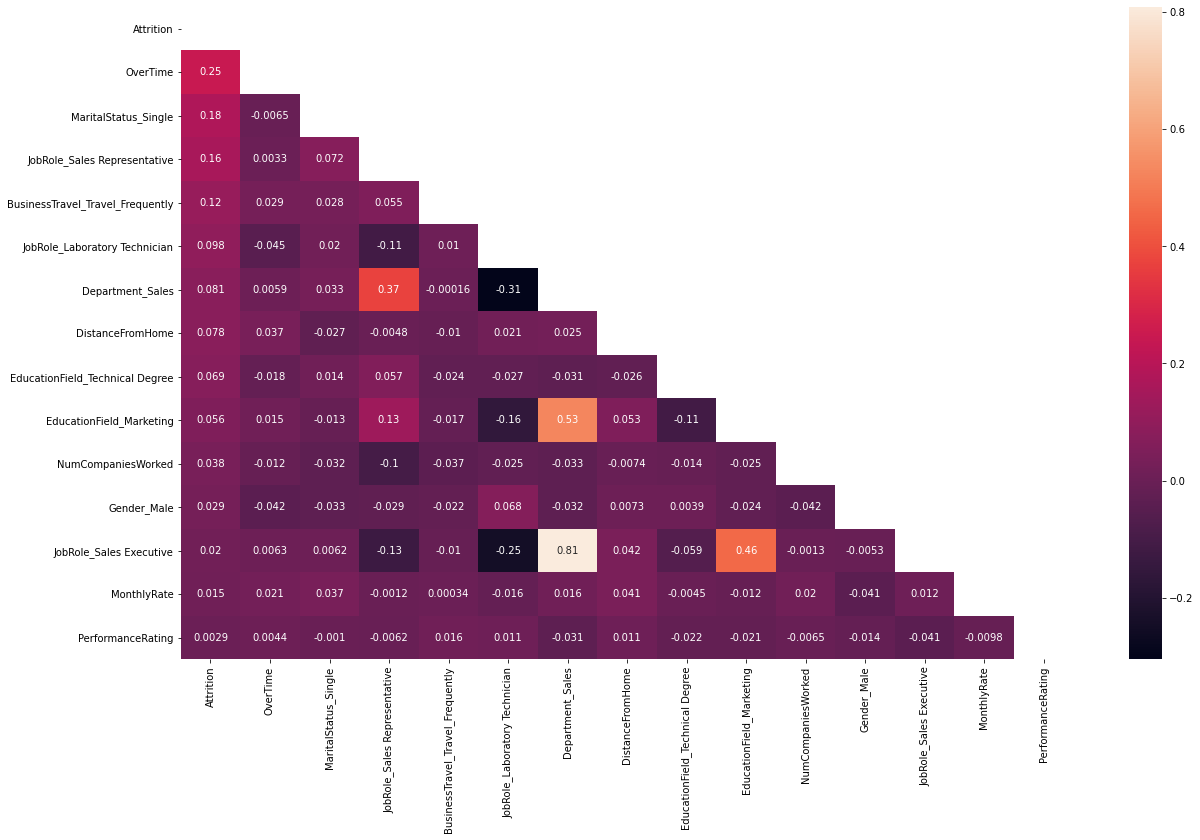

In [32]:
corr=df.corr()
cols=corr.nlargest(15,'Attrition').index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True, yticklabels = cols.values, xticklabels = cols.values, mask = np.triu(cm))

In [ ]:
# Top 20 Features having a correlation with the Target Variable
# Suggestions :-
# JobRole or Department ? (Collinearity is present for these 2 features )
# Dropping the Department Column would be a wiser choice as JobRole will get a clearer picture on the specific profiles to look into

In [33]:
#scaling the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=list(df.columns)
cols.remove('Attrition')
for col in cols:
    df[col]=df[col].astype(float)
    df[[col]]=ss.fit_transform(df[[col]])
df['Attrition']=pd.to_numeric(df['Attrition'],downcast='integer')

In [34]:
#PCA

# PCA is a method used to reduce number of variables in the data by extracting important one from a large pool. It reduces the dimension of data with the aim of retaining as much information as possible

cov_matirx=np.cov(X.T)
eig_vals,eig_vectors=np.linalg.eig(cov_matirx)

In [46]:
eig_vals
# The values are not in order , we need to sort the values 

array([5.06630475e+07, 1.62650679e+05, 4.13055811e+02, 8.45331536e+01,
       1.29153027e+01, 1.34857389e+01, 1.67317893e+00, 1.22621448e+00,
       1.19540849e+00, 1.16681963e+00, 1.00309647e+00, 7.39474046e-01,
       7.20212257e-01, 5.88940324e-01, 5.05449050e-01, 4.89367448e-01,
       4.67814061e-01, 4.44108135e-01, 3.59819125e-01, 3.49893599e-01,
       3.11456800e-01, 2.89367319e-01, 2.43134085e-01, 2.00685704e-01,
       1.77539721e-01, 1.61278279e-01, 1.37093507e-01, 1.15346502e-01,
       9.42076680e-02, 9.10843953e-02, 8.89406995e-02, 7.74199198e-02,
       6.46009927e-02, 5.97852499e-02, 5.67611117e-02, 4.18403546e-02,
       3.63116098e-02, 2.66633392e-02, 1.64727562e-02, 1.00045617e-02,
       6.71966026e-03, 2.54370106e-03, 1.95498692e-03, 5.58907485e-04])

In [56]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]

cum_var_exp=np.cumsum(var_exp)
print('Cumulative variance Explained:',cum_var_exp)


Cumulative variance Explained: [ 99.67892977  99.998943    99.99975569  99.999922    99.99994854
  99.99997395  99.99997724  99.99997965  99.999982    99.9999843
  99.99998627  99.99998773  99.99998915  99.9999903   99.9999913
  99.99999226  99.99999318  99.99999406  99.99999476  99.99999545
  99.99999606  99.99999663  99.99999711  99.99999751  99.99999786
  99.99999817  99.99999844  99.99999867  99.99999886  99.99999903
  99.99999921  99.99999936  99.99999949  99.99999961  99.99999972
  99.9999998   99.99999987  99.99999992  99.99999996  99.99999998
  99.99999999 100.         100.         100.        ]


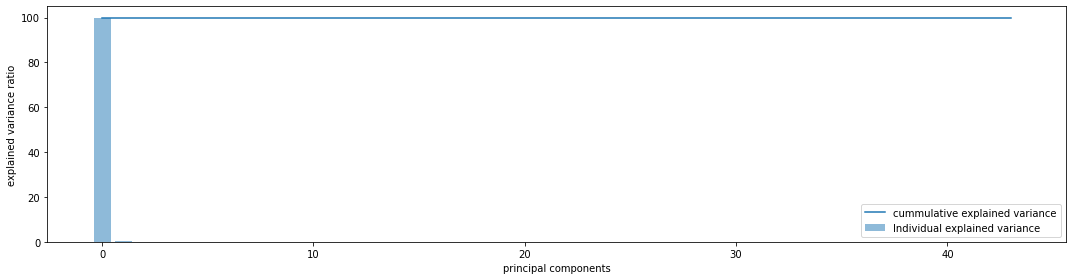

In [57]:
plt.figure(figsize=(15,4))
plt.bar(range(X.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(X.shape[1]),cum_var_exp,where='mid',label='cummulative explained variance')
plt.ylabel("explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
eigen_pairs=[(np.abs(eig_vals[i]),eig_vectors[:,i]) for i in range(len(eig_vals))]

eig_val_sort=[eigen_pairs[index][0] for index in range(len(eig_vals))]
eig_vec_sort=[eigen_pairs[index][1] for index in range(len(eig_vals))]

In [59]:
eig_val_sort.sort(reverse=True)
P_reduce=np.array(eig_vec_sort[0:37]).T
projected_data=np.dot(X,P_reduce)

projected_data_df=pd.DataFrame(projected_data)
projected_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,19476.947681,-1137.771004,-94.010864,-39.623179,-6.793649,8.960195,-0.262256,2.380275,3.566072,0.957146,2.477114,2.160801,2.543262,0.227354,1.835377,-1.925591,-3.794471,1.886200,1.658534,0.603216,0.544681,1.444054,-0.169172,0.660561,0.436220,0.136655,0.445239,0.858998,1.393022,1.827807,-0.922530,-0.879270,0.859376,0.522747,-0.063281,-1.370440,1.138385
1,24906.446533,-324.673519,-62.276042,-48.180379,-12.498168,19.678197,2.863834,-0.937235,4.307881,3.056229,1.742609,2.914629,1.395065,-1.276124,1.200244,-3.453082,-1.778948,0.171025,2.719792,0.612763,-0.470105,1.988521,0.774708,0.507229,-0.933616,0.289903,0.273256,0.465708,1.541551,2.007313,-0.837558,-0.538440,0.632488,0.716735,-0.058025,-1.535601,1.121324
2,2393.480358,-1377.501942,-90.950651,-35.598556,-3.383587,14.603610,2.707387,0.003264,5.086659,0.954303,3.057087,1.961548,1.680817,-0.370416,0.418438,-3.827752,-3.021845,1.388732,1.046047,0.649355,0.709149,2.465627,0.810983,0.819659,0.806619,0.406621,-0.541622,0.297059,1.668378,1.708353,-0.756159,-0.254394,0.167647,-0.155841,-0.079064,-1.278362,1.189309
3,23156.412193,-1434.460698,-55.734590,-31.546381,-3.323159,10.249192,2.523603,0.009812,4.661996,1.732356,5.126614,2.665540,2.729104,-3.079040,1.934350,-3.276290,-1.560407,1.183930,2.527647,0.602617,-0.429545,1.884397,-0.380953,0.956014,-0.259745,0.803506,0.331280,0.170479,1.363908,1.757948,-0.595397,-0.438733,0.675468,0.750192,-0.135859,-1.307495,0.746407
4,16630.889607,-621.496062,-40.321543,-26.319762,-5.304279,10.655773,2.878272,-0.179847,2.315813,3.620357,1.884824,2.438009,2.407470,-2.132961,1.962865,-4.049148,-3.461046,0.312332,0.519088,0.481894,0.634351,2.047050,1.027638,0.027857,0.432832,0.320115,0.157949,0.534163,1.510290,1.865825,-0.755614,-0.500569,0.487798,0.703638,0.122827,-1.347756,1.124105


(1470, 37)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(1029, 44)
(441, 44)
(1029,)
(441,)
(1470, 44)
(1470,)


In [70]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA


pca = PCA(n_components = 37)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)                          


Confusion matrix - Train : 
 [[847  16]
 [103  63]]
Overall Accuracy - Train : 0.8843537414965986
AUC - Train: 0.8437434558628488
**************************************************
Confusion matrix - Test : 
 [[359  11]
 [ 58  13]]
Overall Accuracy - Test : 0.8435374149659864
AUC - Test: 0.7511229539398554
**************************************************
Cross Val Scores
[0.78832117 0.71988666 0.68058764]
Bias Error    : 27.040151118502777
Variance Error: 4.451492703461041


Text(0, 0.5, 'TPR')

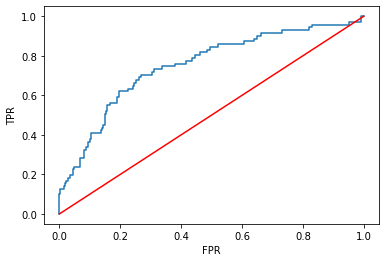

In [71]:
# LOGISITC REGRESSION WITH PCA

from sklearn.linear_model import LogisticRegression
algo= LogisticRegression(random_state = 3)

algo.fit(X_train_pca , y_train)
y_train_pred = algo.predict(X_train_pca)
y_train_prob = algo.predict_proba(X_train_pca)

#overall acc of train model
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred))
print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
print('AUC - Train:', roc_auc_score(y_train , y_train_prob[:,1]))

y_test_pred = algo.predict(X_test_pca)
y_test_prob = algo.predict_proba(X_test_pca)[:,1]

print('*'*50)
print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
print('AUC - Test:', roc_auc_score(y_test , y_test_prob))

print('*'*50)
scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
print('Cross Val Scores')
print(scores)
print('Bias Error    :',100-scores.mean()*100)
print('Variance Error:',scores.std()*100)


fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
plt.plot(fpr , tpr)
plt.plot(fpr , fpr , 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [72]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold

In [73]:
lr = LogisticRegression(fit_intercept=True)
bagged_lr = BaggingClassifier(base_estimator = lr, n_estimators = 25, random_state = 3)
gnb= GaussianNB()
bnb= BernoulliNB()
mnb= MultinomialNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(ccp_alpha=0.01) # to increase pruning and avoid overfitting
rfc= RandomForestClassifier()
svm= SVC(probability=True)

In [74]:
clf=DummyClassifier(strategy='stratified')
clf.fit(X_train,y_train)

DummyClassifier(strategy='stratified')

In [75]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [76]:
print('Base Score on Train Data Set: ',clf.score(X_train,y_train)) 
print('Base Score on Test Data Set : ',clf.score(X_test,y_test))

#now we know that our Supervised Learning Models have to perform better than the above mentioned score

Base Score on Train Data Set:  0.7220602526724975
Base Score on Test Data Set :  0.7369614512471655


In [77]:
from sklearn.metrics import classification_report

In [80]:
def model_eval(algo , X_train , y_train , X_test , y_test):

    algo.fit(X_train , y_train)
    y_pred = algo.predict(X_train)

    y_train_pred = algo.predict(X_train)               # Finding the positives and negatives 
    y_train_prob = algo.predict_proba(X_train)[:,1]    #we are intersted only in the second column


    #overall acc of train model
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    print('AUC - Train:', roc_auc_score(y_train , y_train_prob))

    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('*'*50)
    print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))
    
    print('*'*50)
    scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
    print('Cross Val Scores')
    print(scores)
    print('Bias Error    :',100-scores.mean()*100)
    print('Variance Error:',scores.std()*100)
    
    print('\n')
    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

Confusion matrix - Train : 
 [[863   0]
 [153  13]]
Overall Accuracy - Train : 0.8513119533527697
AUC - Train: 0.7647810244454062
**************************************************
Confusion matrix - Test : 
 [[370   0]
 [ 70   1]]
Overall Accuracy - Test : 0.8412698412698413
AUC - Test: 0.6612866387514275
**************************************************
Cross Val Scores
[0.79500447 0.70445656 0.74009055]
Bias Error    : 25.348280924368893
Variance Error: 3.7244303187407626


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



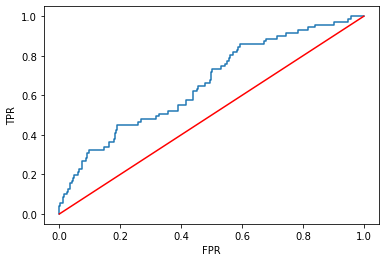

In [81]:
model_eval(bagged_lr , X_train , y_train , X_test , y_test)

In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

Bagged_Logisitc_Regression: 0.739659 (0.000425)
Ada_Boost_Logistic_Regression: 0.758873 (0.000350)
Gradient_Boost: 0.819811 (0.003891)


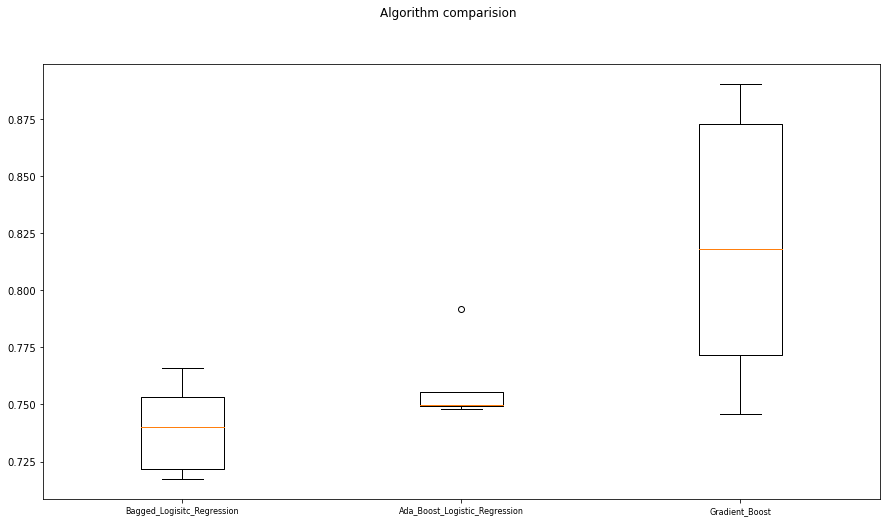

In [83]:
bagged_lr=BaggingClassifier(base_estimator=lr,n_estimators=15,random_state=3)
adaboost_lr=AdaBoostClassifier(base_estimator=lr,n_estimators=50,random_state=3)   #default decision tree
gb=GradientBoostingClassifier(n_estimators=55,random_state=3)                   # Cannot have base_estimator

models=[]
models.append(('Bagged_Logisitc_Regression',bagged_lr))
models.append(('Ada_Boost_Logistic_Regression',adaboost_lr))
models.append(('Gradient_Boost',gb))



results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

Confusion matrix - Train : 
 [[854   9]
 [138  28]]
Overall Accuracy - Train : 0.8571428571428571
AUC - Train: 0.8365885325775873
**************************************************
Confusion matrix - Test : 
 [[356  14]
 [ 67   4]]
Overall Accuracy - Test : 0.8163265306122449
AUC - Test: 0.5586220022839741
**************************************************
Cross Val Scores
[0.52018849 0.58686747 0.57476362]
Bias Error    : 43.939347274836514
Variance Error: 2.9003899370090633


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       370
           1       0.22      0.06      0.09        71

    accuracy                           0.82       441
   macro avg       0.53      0.51      0.49       441
weighted avg       0.74      0.82      0.77       441



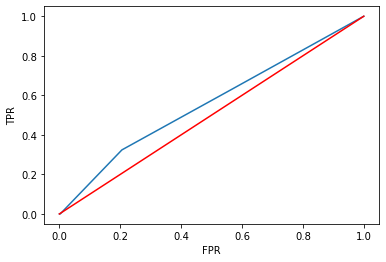

In [84]:
#knn
model_eval(knn , X_train , y_train , X_test , y_test)

Bagged_KNN: 0.510921 (0.001639)
Ada_Boost: 0.816371 (0.001445)


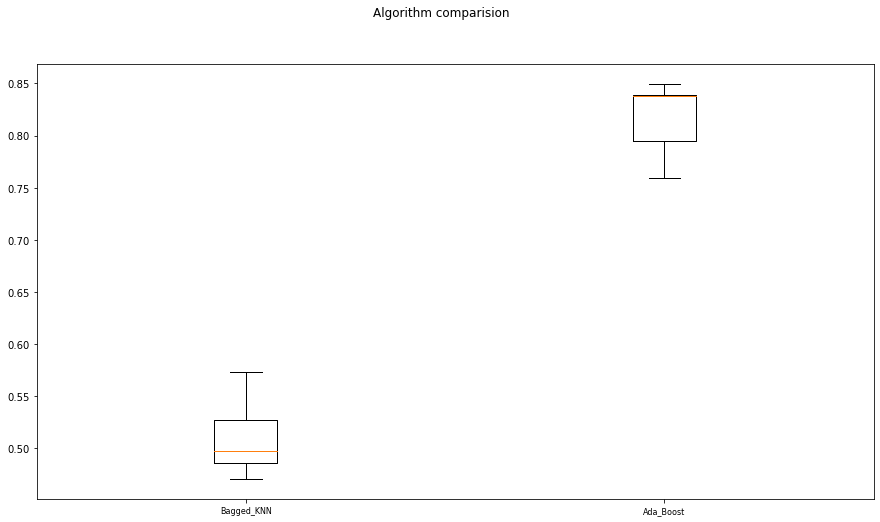

In [85]:
bagged_knn=BaggingClassifier(base_estimator=knn,n_estimators=15,random_state=3) # default DT, cannot use RandomForest
adaboost=AdaBoostClassifier(n_estimators=50,random_state=3)                    # default decision tree, cannot use KNN


models=[]
models.append(('Bagged_KNN',bagged_knn))
models.append(('Ada_Boost',adaboost))




results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

Confusion matrix - Train : 
 [[723 140]
 [ 58 108]]
Overall Accuracy - Train : 0.8075801749271136
AUC - Train: 0.8070195032738137
**************************************************
Confusion matrix - Test : 
 [[293  77]
 [ 32  39]]
Overall Accuracy - Test : 0.7528344671201814
AUC - Test: 0.7138941758660069
**************************************************
Cross Val Scores
[0.81431519 0.73707228 0.75967846]
Bias Error    : 22.964468672682656
Variance Error: 3.2425433323529167


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       370
           1       0.34      0.55      0.42        71

    accuracy                           0.75       441
   macro avg       0.62      0.67      0.63       441
weighted avg       0.81      0.75      0.77       441



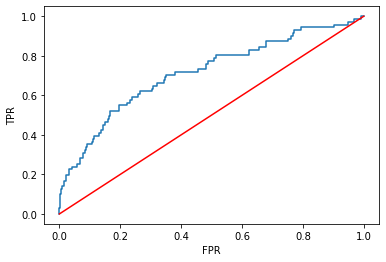

In [86]:
model_eval(gnb , X_train , y_train , X_test , y_test)

Naive_Bayes_Gaussian: 0.787508 (0.001925)
Naive_Bayes_Bernoulli: 0.777050 (0.004054)
Gaussian_bagged: 0.786920 (0.001849)
Bernoulli_bagged: 0.773131 (0.003602)
Adaboost_Gaussian: 0.618639 (0.003381)
Adaboost_Bernoulli: 0.792989 (0.003590)


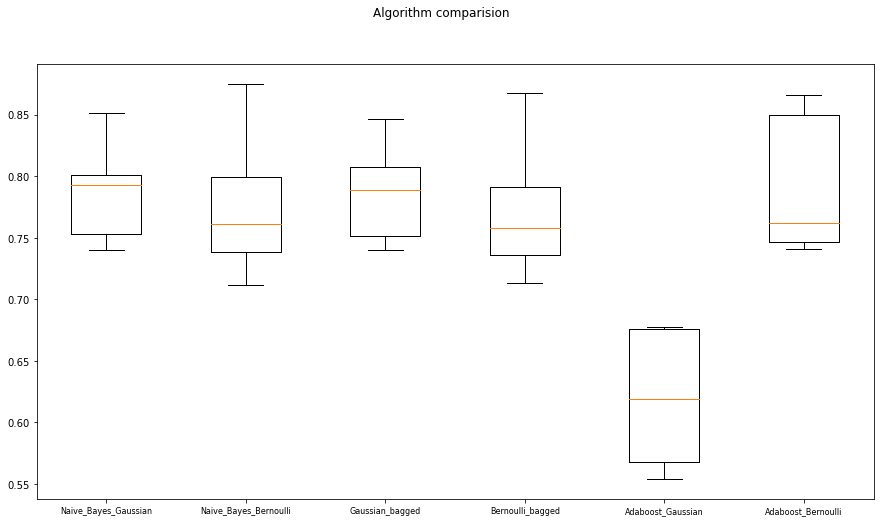

In [88]:
gnb= GaussianNB()
bnb= BernoulliNB()

gaussian_bag=BaggingClassifier(base_estimator=gnb,n_estimators=10,random_state=3)
gaussian_adaboost=AdaBoostClassifier(base_estimator=gnb,n_estimators=30,random_state=3)
bernoulli_bag=BaggingClassifier(base_estimator=bnb,n_estimators=10,random_state=3)
bernoulli_adaboost=AdaBoostClassifier(base_estimator=bnb,n_estimators=30,random_state=3)



models=[]
models.append(('Naive_Bayes_Gaussian',gnb))
models.append(('Naive_Bayes_Bernoulli',bnb))
models.append(('Gaussian_bagged',gaussian_bag))
models.append(('Bernoulli_bagged',bernoulli_bag))
models.append(('Adaboost_Gaussian',gaussian_adaboost))
models.append(('Adaboost_Bernoulli',bernoulli_adaboost))

results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()


Confusion matrix - Train : 
 [[820  43]
 [109  57]]
Overall Accuracy - Train : 0.8522837706511176
AUC - Train: 0.7197783020843513
**************************************************
Confusion matrix - Test : 
 [[348  22]
 [ 51  20]]
Overall Accuracy - Test : 0.8344671201814059
AUC - Test: 0.6899885801294252
**************************************************
Cross Val Scores
[0.58774523 0.68617758 0.65020481]
Bias Error    : 35.86241235229501
Variance Error: 4.066689467731561


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       370
           1       0.48      0.28      0.35        71

    accuracy                           0.83       441
   macro avg       0.67      0.61      0.63       441
weighted avg       0.81      0.83      0.82       441



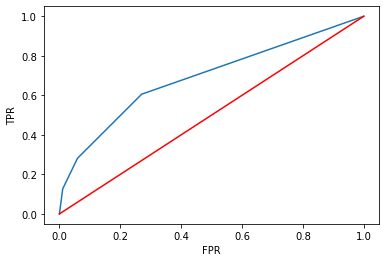

In [89]:
model_eval(dtc , X_train , y_train , X_test , y_test)

Bagged_DTC: 0.756921 (0.003527)
Adaboost_DTC: 0.816371 (0.001445)


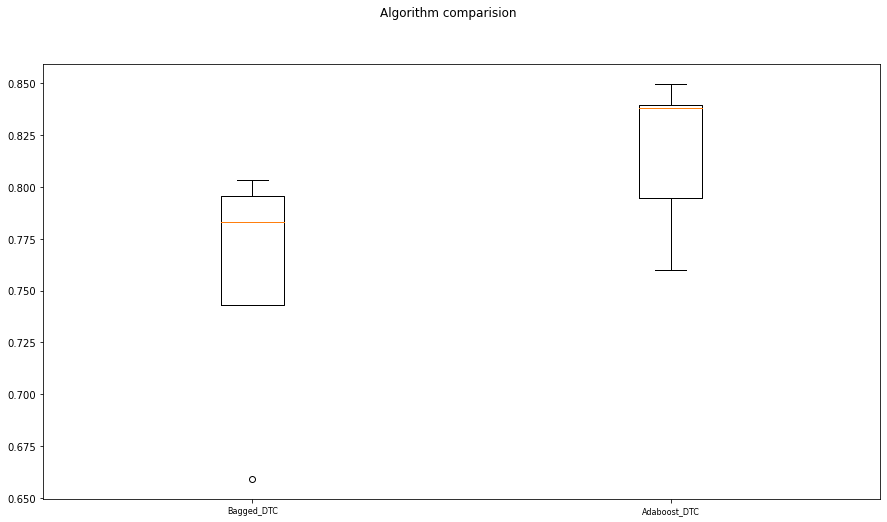

In [90]:
bagged_dtc=BaggingClassifier(n_estimators=15,random_state=3)       # default decision tree, cannot use RandomF 
adaboost_dtc=AdaBoostClassifier(n_estimators=50,random_state=3)       # default decision tree, cannot use KNN


models=[]
models.append(('Bagged_DTC',bagged_dtc))
models.append(('Adaboost_DTC',adaboost_dtc))




results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

Confusion matrix - Train : 
 [[863   0]
 [  0 166]]
Overall Accuracy - Train : 1.0
AUC - Train: 1.0
**************************************************
Confusion matrix - Test : 
 [[367   3]
 [ 62   9]]
Overall Accuracy - Test : 0.8526077097505669
AUC - Test: 0.7846402740768937
**************************************************
Cross Val Scores
[0.79357233 0.80184176 0.80676953]
Bias Error    : 19.92721262332276
Variance Error: 0.5445003608505468


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.75      0.13      0.22        71

    accuracy                           0.85       441
   macro avg       0.80      0.56      0.57       441
weighted avg       0.84      0.85      0.81       441



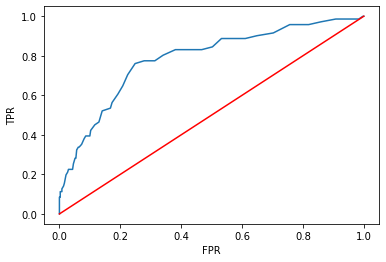

In [91]:
model_eval(rfc , X_train , y_train , X_test , y_test)

Bagged_RFC: 0.804582 (0.001443)
Adaboost_RFC: 0.802823 (0.001783)


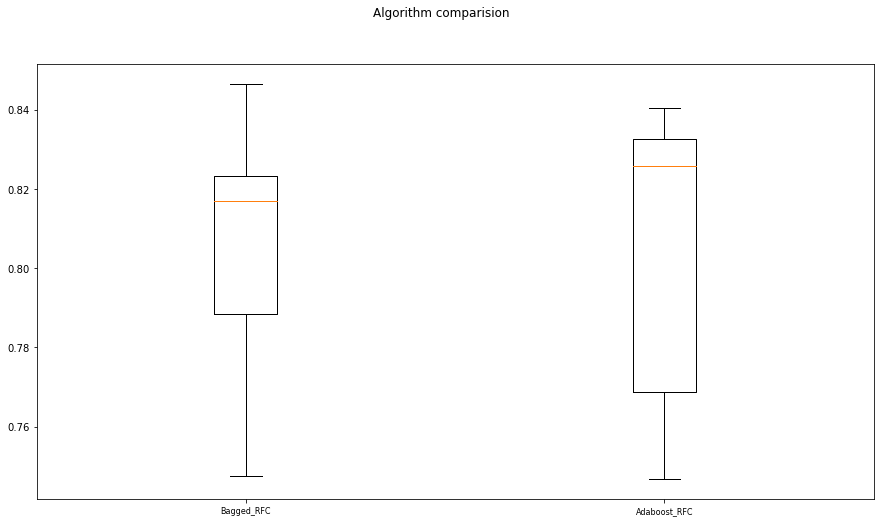

In [92]:
bagged_rfc=BaggingClassifier(base_estimator=rfc,n_estimators=15,random_state=3)       # default decision tree, cannot use RandomF 
adaboost_rfc=AdaBoostClassifier(base_estimator=rfc,n_estimators=50,random_state=3)   # default decision tree, cannot use KNN
             

models=[]
models.append(('Bagged_RFC',bagged_rfc))
models.append(('Adaboost_RFC',adaboost_rfc))




results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

In [93]:
#Using Randomised Search Cross Validation to Search for the best parameters

from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=3)
params = { 'n_estimators' : sp_randint(50 , 200) , 
           'max_features' : sp_randint(1,26) ,
           'max_depth' : sp_randint(2,10) , 
           'min_samples_split' : sp_randint(2,10) ,
           'min_samples_leaf' : sp_randint(1,10) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_rfc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 200 , cv = 3 , scoring='roc_auc' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=3),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f80b3a47550>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f80b3d921c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f80b4030340>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f80b3e4fc10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f80b3e4f640>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [94]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 140}

Confusion Matrix - Train: 
 [[863   0]
 [ 81  85]]
Overall Accuracy - Train: 0.9212827988338192
AUC- Train 0.9916933085761354


Confusion Matrix - Test: 
 [[363   7]
 [ 63   8]]
Overall Accuracy - Test: 0.8412698412698413
AUC- Test 0.771145793681005




Text(0, 0.5, 'TPR')

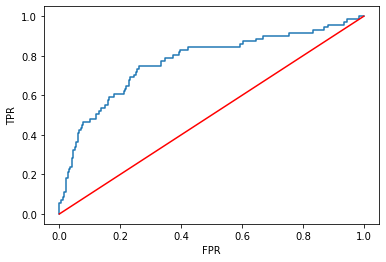

In [95]:
rfc= RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)

rfc.fit(X_train,y_train)

y_train_pred=rfc.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=rfc.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column



print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [96]:
col_sorted_by_importance=rfc.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rfc.feature_importances_[col_sorted_by_importance]
})

feat_imp.sort_values(by='imps',ascending=False)[:10]


,cols,imps
43,MonthlyIncome,0.083593
42,OverTime,0.081235
41,TotalWorkingYears,0.062035
40,Age,0.060875
39,DailyRate,0.059179
38,YearsAtCompany,0.049238
37,DistanceFromHome,0.046807
36,HourlyRate,0.046387
35,MonthlyRate,0.045390
34,YearsWithCurrManager,0.038709


Confusion matrix - Train : 
 [[863   0]
 [166   0]]
Overall Accuracy - Train : 0.8386783284742468
AUC - Train: 0.48638819472559996
**************************************************
Confusion matrix - Test : 
 [[370   0]
 [ 71   0]]
Overall Accuracy - Test : 0.8390022675736961
AUC - Test: 0.5169014084507042
**************************************************
Cross Val Scores
[0.50826943 0.48914349 0.53561859]
Bias Error    : 48.898949767470526
Variance Error: 1.9072123426305143


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



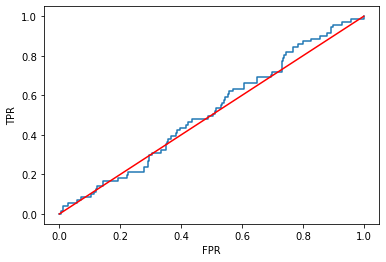

In [97]:
#Support vector machines
model_eval(svm, X_train , y_train , X_test , y_test)

In [98]:
from sklearn.svm import SVC
svm=SVC(probability=True)

kernel=['linear','poly','rbf','sigmoid']

for i in kernel:
    svm=SVC(kernel=i,C=1.0)
    svm.fit(X_train,y_train)
    print('For kernel i,',i)
    print('accuracy is' ,svm.score(X_test,y_test))

For kernel i, linear
accuracy is 0.8390022675736961
For kernel i, poly
accuracy is 0.8390022675736961
For kernel i, rbf
accuracy is 0.8390022675736961
For kernel i, sigmoid
accuracy is 0.8390022675736961


In [ ]:
from sklearn.model_selection import GridSearchCV 
svm=SVC(probability=True,class_weight='balanced',random_state=3)
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'coef0':[0.001,10,0.5],
              'kernel': ['rbf','poly', 'sigmoid']}  
  
grid_search_svm = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_search_svm.fit(X_train,y_train) 

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV 1/5] END C=0.1, coef0=0.001, gamma=1, kernel=rbf;, score=0.160 total time=   0.2s
[CV 2/5] END C=0.1, coef0=0.001, gamma=1, kernel=rbf;, score=0.160 total time=   0.2s
[CV 3/5] END C=0.1, coef0=0.001, gamma=1, kernel=rbf;, score=0.160 total time=   0.3s
[CV 4/5] END C=0.1, coef0=0.001, gamma=1, kernel=rbf;, score=0.835 total time=   0.2s
[CV 5/5] END C=0.1, coef0=0.001, gamma=1, kernel=rbf;, score=0.161 total time=   0.2s


In [ ]:
# print best parameter after tuning 
print(grid_search_svm.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_svm.best_estimator_) 

In [ ]:
svm= SVC(probability=True,**grid_search_svm.best_params_,random_state=3)

svm.fit(X_train,y_train)

y_train_pred=svm.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=svm.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column



print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
bagged_svm=BaggingClassifier(base_estimator=svm,n_estimators=15,random_state=3)       # default decision tree, cannot use RandomF 
adaboost_svm=AdaBoostClassifier(base_estimator=svm,n_estimators=15,random_state=3)   # default decision tree, cannot use KNN
gb_lr=GradientBoostingClassifier(n_estimators=55,random_state=3)                # Does not have base_estimator, uses DT as stump

models=[]
models.append(('Bagged_SVM',bagged_svm))
models.append(('Adaboost_SVM',adaboost_svm))
models.append(('Gradient_Boost',gb_lr))



results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

In [ ]:
#XGBoost

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

params = {
        'min_child_weight': [1,2,3,4,5,6,7,8,9,10],
        'gamma': [0.5, 1,1,1.25,1.35,1.45, 1.5,1.75, 2, 5],
        'subsample': [0.6,0.7 ,0.8,0.9, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.1,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 3)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=3 )

random_search.fit(X, y)

In [ ]:
xgb= XGBClassifier(**random_search.best_params_,random_state=3)

xgb.fit(X_train,y_train)

y_train_pred=xgb.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=xgb.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column



print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=xgb.predict(X_test)
y_test_prob=xgb.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))
print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params = {
    'n_estimators' : sp_randint(50,200) , 
    'max_depth' : sp_randint(2,15) ,
    'learning_rate' : sp_uniform(0.001 , 0.5 ) ,
    'num_leaves' : sp_randint(20 , 50) 
} 


rsearch = RandomizedSearchCV(lgbm , param_distributions= params , cv = 3 , n_iter= 200 , n_jobs=-1 ,random_state= 3)

rsearch.fit(X , y)

In [ ]:
rsearch.best_estimator_

In [ ]:
lgbm= lgb.LGBMClassifier(**rsearch.best_params_)

lgbm.fit(X_train,y_train)

y_train_pred=lgbm.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=lgbm.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column

print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=lgbm.predict(X_test)
y_test_prob=lgbm.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')